# MOPs Installation, Testing, Running and Analysis Tutorial


## Sections:  
1. [Installation](#Installation)  
  i. [Pre-requisite software](#Pre-requisite-software)  
 ii. [Clone MOPs](#Clone-MOPs)  
iii. [Remaining dependencies](#Acquire-remaining-dependencies)  
 iv. [Compiling MOPs](#Compiling-MOPs)  
  v. [MOPs executables](#Exporting-MOPs-executables-to-PATH)
2. [Testing MOPs](#Testing-MOPs)  
3. [Running MOPs](#Running-MOPs)  
4. [Analyzing MOPs](#Analyzing-MOPs)  

## Installation:

If you wish to use this notebook to install MOPS, add the location you wish to install MOPs in:

In [1]:
MOPS_INSTALL_DIRECTORY = "mops"

### Pre-requisite software:
MOPs requires the lsst stack, specifically the following packages:
    - boost
    - gsl
    - eigen
    
Before continuing with the installation insure that these are properly setup. The following command will allow you to check.

In [2]:
! eups list -s

boost                 1.59.lsst5 	current b1828 setup
eigen                 3.2.5      	current b1828 setup
gsl                   1.16.lsst3 	current b1828 setup
python                system     	current setup


### Clone MOPs

#### Option 1: Clone lsst/mops_daymops
The current release of MOPs is located here:  
https://github.com/lsst/mops_daymops

In [ ]:
! git clone https://github.com/lsst/mops_daymops.git {MOPS_INSTALL_DIRECTORY}/mops_daymops

#### Option 2: Clone an updated fork

Currently the latest updates to the mops_daymops repository are located in a fork here:  
https://github.com/moeyensj/mops_daymops

Clone this fork instead if you wish to use the scripts in this repository (in the future, pending review, we expect this fork to be merged with lsst/mops_daymops master):

In [3]:
! git clone https://github.com/moeyensj/mops_daymops.git {MOPS_INSTALL_DIRECTORY}/mops_daymops

Cloning into 'mops/mops_daymops'...
remote: Counting objects: 3730, done.
remote: Total 3730 (delta 0), reused 0 (delta 0), pack-reused 3730
Receiving objects: 100% (3730/3730), 24.60 MiB | 10.85 MiB/s, done.
Resolving deltas: 100% (2391/2391), done.
Checking connectivity... done.


### Acquire remaining dependencies
#### Option 1: SLALIB MOPs
Once you have installed the lsst stack and setup the appropriate packages, you then need to make sure you have SLALIB. Insure that SLALIB is installed at the same directory level as where you cloned mops_daymops.

<pre>
MOPS_INSTALL_DIRECTORY/mops_daymops/  
MOPS_INSTALL_DIRECTORY/slalib_C/  
</pre>

In [4]:
! ls {MOPS_INSTALL_DIRECTORY}

mops_daymops slalib_C


#### Option 2: PAL MOPs
There has been significant effort into replacing SLALIB with PAL. This work is still on-going, once complete installation procedures will be updated here.

### Compiling MOPs

After acquring the remaining software we can proceed with compiling MOPs. Assuming the lsst packages are setup and you have one of the above remaining dependencies we can then proceed. The following command will "make" MOPs (don't worry if you see some warnings on Mac OSX): 

In [5]:
! cd {MOPS_INSTALL_DIRECTORY}/mops_daymops/src/ && make

c++ -O3 -DNOPEX  -c  MopsDetection.cc -I /Users/joachim/anaconda/opt/lsst/eigen/include/ -I /Users/joachim/anaconda/opt/lsst/boost/include/ -I ../../slalib_C/include/ -I /Users/joachim/anaconda/opt/lsst/gsl/include -I ../include/
c++ -O3 -DNOPEX  -c  PointAndValue.cc -I /Users/joachim/anaconda/opt/lsst/eigen/include/ -I /Users/joachim/anaconda/opt/lsst/boost/include/ -I ../../slalib_C/include/ -I /Users/joachim/anaconda/opt/lsst/gsl/include -I ../include/
c++ -O3 -DNOPEX  -c  common.cc -I /Users/joachim/anaconda/opt/lsst/eigen/include/ -I /Users/joachim/anaconda/opt/lsst/boost/include/ -I ../../slalib_C/include/ -I /Users/joachim/anaconda/opt/lsst/gsl/include -I ../include/
c++ -O3 -DNOPEX  -c  Tracklet.cc -I /Users/joachim/anaconda/opt/lsst/eigen/include/ -I /Users/joachim/anaconda/opt/lsst/boost/include/ -I ../../slalib_C/include/ -I /Users/joachim/anaconda/opt/lsst/gsl/include -I ../include/
c++ -O3 -DNOPEX  -c Track.cc -I /Users/joachim/anaconda/opt/lsst/eigen/include/ -I /Users/jo

### Exporting MOPs executables to PATH

Now we can source the MOPs executables for use in our respective shells. (It is highly recommended that if you wish to frequently use MOPs that you add this to your shell configuration). 

<pre>
export PATH="MOPS_INSTALL_DIRECTORY/mops_daymops/bin:$PATH"  
export MOPS_DIR="MOPS_INSTALL_DIRECTORY/mops_daymops"
</pre>

Don't forget to replace MOPS_INSTALL_DIRECTORY with the appropriate file path.

I have the following in my bash profile:

<pre>
alias setupMops="""  
setup eigen &&  
setup gsl &&  
setup boost &&  
export PATH="/Users/joachim/repos/forked/mops_slalib/mops_daymops/bin:$PATH"  
export MOPS_DIR="/Users/joachim/repos/forked/mops_slalib/mops_daymops"  
export PYTHONPATH="${PYTHONPATH}:/Users/joachim/repos/neosim"
"""
</pre>

It allows me to get MOPs ready by just typing setupMops in my terminal. I then have access to all my python scripts in this repository, and all MOPs executables as well.

## Testing MOPs
This repository contains a unittest script which runs MOPs on a small sample of data and compares the output to the expected results:

*Disclaimer: Without the intent of doing so, the MopsUnittest script depends on other scripts in this repository. Until these scripts are more concisely packaged you will need to add this repository to your python path in order to achieve full functionality. (SEE: the setupMops alias a few cells above.)*

In [2]:
! python MopsUnittest.py 

------- MOPS Tracker --------
Current run status:

	findTracklets:                     False
	idsToIndices.py:                   False
	collapseTracklets:                 False
	purifyTracklets:                   False
	removeSubsets                      False
	indicesToIds.py:                   False
	makeLinkTrackletsInputByNight.py:  False
	linkTracklets:                     False

------- MOPS Parameters --------
Current Parameter Values:

---- findTracklets ----
	Maximum velocity:                         0.5
	Minimum velocity:                         0.0
---- collapseTracklets ----
	Right Ascension tolerance:                0.002
	Declination tolerance:                    0.002
	Angular tolerance:                        5
	Velocity tolerance:                       0.05
	Method:                                   greedy
	Use RMS filter:                           True
	Maximum RMS:                              0.001
---- purifyTracklets ----
	Maximum RMS:                             

## Running MOPs
Running MOPs can be done in several ways. You can choose to run each MOPs function individually or you can use the runMops.py script provided. Running MOPs function by function manually can be as easy as calling the executables that by now are hopefully sourced. 

In [3]:
! linkTracklets

Usage: linkTracklets -d <detections file> -t <tracklets file> -o <output (tracks) file>
  optional arguments: 
     -e / --detectionErrorThresh (float) : maximum allowed observational error, default = 0.00020000000000000001
     -D / --maxDecAcceleration (float) : maximum sky-plane acceleration of a track (declination),  default = 0.02
     -R / --maxRAAcceleration (float) : maximum sky-plane acceleration of a track (RA), default = 0.02
     -F / --latestFirstEndpoint (float) : if specified, only search for tracks with first endpoint before time specified
     -L / --earliestLastEndpoint (float) : if specified, only search for tracks with last endpoint after time specified
     -u / --minNights (int) : require tracks contain detections from at least this many nights, default = 3
     -s / --minDetections (int) : require tracks contain at least this many detections, default = 6
     -b / --outputBufferSize (int) : number of tracks to buffer in memory before flushing output. Default = 10

To make running MOPs a little easier I wrote a python script which automates the process and keeps track of all the output, input files. 

Of course, to run MOPs you will need some data. The unittest folder contains a set of test sources on which we can run MOPs.

In [4]:
import os

In [5]:
raw_data = os.path.abspath("unittest/testData/testsourcesEdited.txt")

Before we proceed lets take a quick look at the data:

In [6]:
import MopsReader 

In [7]:
dets = MopsReader.readDetectionsIntoDataframe(raw_data)
dets

,obshistid,ssmid,ra,dec,mjd,mag,snr
diaid,,,,,,,
0,0,1,220.643549,-21.965527,59580.16,15.181889,5
1,1,1,220.659667,-21.970416,59580.20,15.181976,5
2,2,1,221.042042,-22.085481,59581.16,15.184020,5
3,3,1,221.058056,-22.090310,59581.20,15.184099,5
4,4,1,221.437935,-22.203902,59582.16,15.185958,5
5,5,1,221.453842,-22.208670,59582.20,15.186030,5
6,6,1,221.831176,-22.320788,59583.16,15.187702,5
7,7,1,221.846974,-22.325496,59583.20,15.187766,5
8,8,1,222.221714,-22.436138,59584.16,15.189252,5


In [36]:
import MopsPlotter

% matplotlib inline

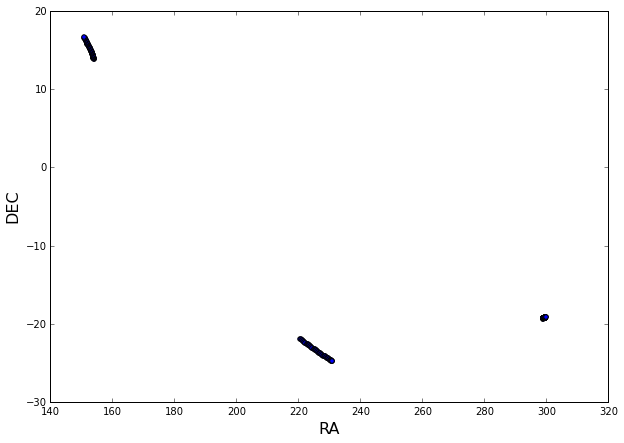

In [37]:
MopsPlotter.plotDataframe(dets)

Before running MOPs we must convert the data file into a set of detection files grouped by night. This can be done in the following way:

In [41]:
# output directory for detections split into nightly files
nightly = os.path.abspath("") + "/tutorial/nightly/" 
# output directory for detections split into by image files
obshist = os.path.abspath("") + "/tutorial/obshist/"

In [42]:
! mkdir {nightly}
! mkdir {obshist}

import subprocess
call = ["python", os.getenv("MOPS_DIR") + "/bin/splitByNight.py", raw_data, nightly, obshist]
subprocess.call(call);

# equivalent to:
# ! python $MOPS_DIR/bin/splitByNight.py data nightly_dir obshist_dir

Lets see if it generated the appropriate output files:

In [43]:
os.listdir(nightly)[:5]

['59580.dias', '59581.dias', '59582.dias', '59583.dias', '59584.dias']

Now we can run MOPs on the sample data above using the included script.

In [45]:
! python runMops.py tutorial/nightly/ tutorial/run/

------- Run MOPS -------
Running LSST's Moving Object Pipeline

------- MOPS Parameters --------
Current Parameter Values:

---- findTracklets ----
	Maximum velocity:                         0.5
	Minimum velocity:                         0.0
---- collapseTracklets ----
	Right Ascension tolerance:                0.002
	Declination tolerance:                    0.002
	Angular tolerance:                        5
	Velocity tolerance:                       0.05
	Method:                                   greedy
	Use RMS filter:                           True
	Maximum RMS:                              0.001
---- purifyTracklets ----
	Maximum RMS:                              0.001
---- removeSubsets ----
	Remove subsets:                           False
	Keep only longest:                        False
---- makeLinkTrackletsInput_byNight.py ----
	Window size:                              15
---- linkTracklets ----
	 Detection error threshold:               0.0004
	 Maximum right ascension accel

## Analyzing MOPs

Now that you have run MOPs (hopefully without too much difficulty), we should take a look at the results. The runMops script generates two objects and saves them as .yaml files. One object tracks the files generated, the other tracks the parameters use to run MOPs. 

In [46]:
## More to come.